# Linear Regression from Scratch
This notebook demonstrates how to implement Linear Regression from scratch in Python using only Numpy, Pandas, and Matplotlib for visualization. The dataset used is a medical cost dataset, which is uploaded and loaded below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import base64

from google.colab import files
uploded=files.upload()
df = pd.read_csv(file_path)
df.head()

Saving Medical Price Dataset.csv to Medical Price Dataset.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Exploration
Check for null values and view dataset statistics.

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

## Data Preprocessing
We will:
- Encode categorical variables
- Normalize the numerical features
- Separate features and target variable.

In [7]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Convert boolean columns to integers
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Feature matrix and target vector
X = df_encoded.drop('charges', axis=1).values
y = df_encoded['charges'].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Manually split data into training and test sets
split_index = int(0.8 * len(X))
x_train, x_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

## Linear Regression Function
Using the Normal Equation to compute the weights.

In [8]:
def linear_regression(x_train, y_train):
    X_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Add bias term
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    return theta_best

theta = linear_regression(x_train, y_train)

## Model Evaluation
We evaluate the model using Mean Squared Error and R² Score.

In [9]:
# Predictions
X_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]
y_pred = X_test_b.dot(theta)

# Mean Squared Error
mse = np.mean((y_pred - y_test)**2)

# R² Score
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ss_res / ss_tot)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2_score:.4f}")

Mean Squared Error: 37175951.41
R² Score: 0.7585


## Visualization
Plotting actual vs predicted values.

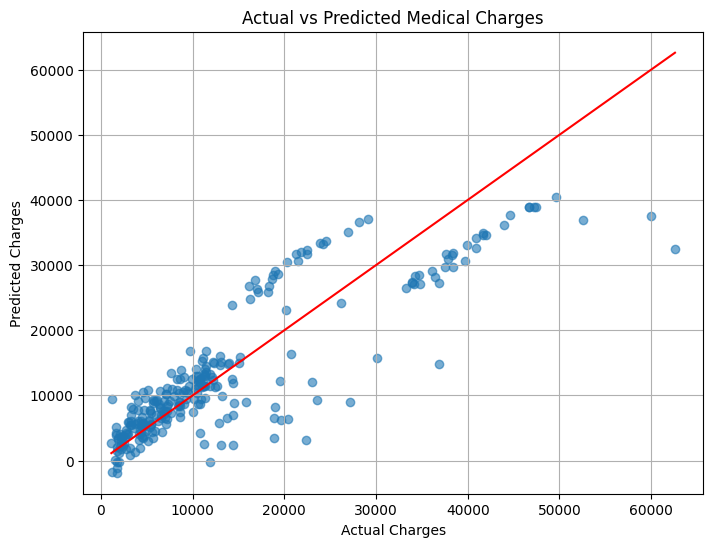

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

## Conclusion
We successfully implemented Linear Regression from scratch using the Normal Equation. No machine learning libraries were used in model training. Results show a good fit, and further improvements can be made with feature engineering and model tuning.